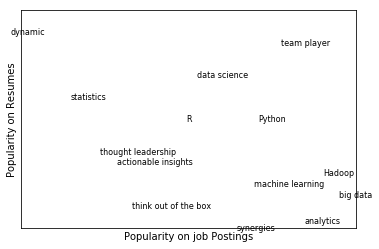

In [26]:
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from collections import defaultdict,Counter
import requests,re,random

#natural language processing

data=[("big data",100,15),("Hadoop",95,25),("Python",75,50),("R",50,50),("machine learning",80,20),("statistics",20,60),
     ("data science",60,70),("analytics",90,3),("team player",85,85),("dynamic",2,90),("synergies",70,0),
     ("actionable insights",40,30),("think out of the box",45,10),("thought leadership",35,35)]

def text_size(total):
    return 8+total/200*20

for word,job_popularity,resume_popularity in data:
    plt.text(job_popularity,resume_popularity,word,
            ha='center',va='center',size=text_size(job_popularity+resume_popularity))
plt.xlabel("Popularity on job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0,100,0,100])
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
#n-gram

def fix_unicode(text):
    return text.replace(u"\u2019","'")



url="http://radar.oreilly.com/2010/06/what-is-data-science.html"
html=requests.get(url).text
soup=BeautifulSoup(html,'html5lib')
content=soup.find("div","article-body")
regex=r"[\w']+|[\.]"

document=[]

for paragraph in content("p"):
    words=re.findall(regex,fix_unicode(paragraph.text))
    document.extend(words)


In [19]:
from collections import defaultdict
import random

bigrams=zip(document,document[1:])
transitions=defaultdict(list)
for prev,current in bigrams:
    transitions[prev].append(current)
    
def generate_using_bigrams():
    current="."
    result=[]
    while True:
        next_word_candidates=transitions[current] #第一輪他會找句點後的第一個詞
        current=random.choice(next_word_candidates)
        result.append(current)
        if current==".":return " ".join(result)

generate_using_bigrams()

u'They accept all heard big problem involves making a public website by a set of followers on data .'

In [21]:
trigrams=zip(document,document[1:],document[2:])
trigram_transitions=defaultdict(list)
starts=[]

for prev,current,next in trigrams:
    if prev==".":
        starts.append(current)
        
    trigram_transitions[(prev,current)].append(next)

def generate_using_trigrams():
    current=random.choice(starts)
    prev="."
    result=[current]
    while True:
        next_word_candidates=trigram_transitions[(prev,current)]
        next_word=random.choice(next_word_candidates)
        
        prev,current=current,next_word
        result.append(current)
        
        if current==".":return " ".join(result)

generate_using_trigrams()

u'Patil described the process worked quite differently it started out with a background in computer science majors .'

In [23]:
##part of speech

grammar={
    "_S":["_NP _VP"],
    "_NP":["_N","_A _NP _P _A _N"],
    "_VP":["_V","_V _NP"],
    "_N":["data science","Python","regression"],
    "_A":["big","linear","logistic"],
    "_P":["about","near"],
    "_V":["learns","trains","tests","is"]
}

def is_terminal(token):
    return token[0] !="_"

def expand(grammar,tokens):
    for i,token in enumerate(tokens):
        
        if is_terminal(token): continue
        
        replacement=random.choice(grammar[token])
        
        if is_terminal(replacement):
            tokens[i]=replacement
        else:
            tokens=tokens[:i]+replacement.split()+tokens[(i+1):]
        
        return expand(grammar,tokens)
    return tokens

def generate_sentence(grammar):
    return expand(grammar,["_S"])

generate_sentence(grammar)

['Python', 'is', 'big', 'Python', 'about', 'logistic', 'regression']

In [24]:
#gibbs 抽樣

def roll_a_die():
    return random.choice([1,2,3,4,5,6])

def direct_sample():
    d1=roll_a_die()
    d2=roll_a_die()
    return d1,d1+d2

def random_y_given_x(x):
    return x+roll_a_die()

def random_x_given_y(y):
    if y<=7:
        return random.randrange(1,y)
    else:
        return random.randrange(y-6,7)

def gibbs_sample(num_iters=100):
    x,y=2,3 #隨意取起始值沒關係
    
    for _ in range(num_iters):
        x=random_x_given_y(y)
        y=random_y_given_x(x)
    return x,y

def compare_distributions(num_samples=1000):
    counts=defaultdict(lambda:[0,0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0]+=1
        counts[direct_sample()][1]+=1
    return counts

compare_distributions()

defaultdict(<function __main__.<lambda>>,
            {(1, 2): [25, 32],
             (1, 3): [33, 30],
             (1, 4): [41, 30],
             (1, 5): [23, 26],
             (1, 6): [23, 30],
             (1, 7): [21, 31],
             (2, 3): [27, 38],
             (2, 4): [18, 33],
             (2, 5): [37, 25],
             (2, 6): [24, 45],
             (2, 7): [31, 30],
             (2, 8): [25, 23],
             (3, 4): [26, 22],
             (3, 5): [36, 31],
             (3, 6): [23, 33],
             (3, 7): [27, 24],
             (3, 8): [29, 31],
             (3, 9): [30, 25],
             (4, 5): [22, 21],
             (4, 6): [21, 24],
             (4, 7): [27, 18],
             (4, 8): [43, 18],
             (4, 9): [33, 27],
             (4, 10): [28, 21],
             (5, 6): [31, 20],
             (5, 7): [31, 27],
             (5, 8): [27, 27],
             (5, 9): [29, 24],
             (5, 10): [29, 25],
             (5, 11): [34, 31],
             (6, 7): [27,

In [65]:
def sample_from(weights):
    total=sum(weights)
    rnd=total*random.random()
    for i,w in enumerate(weights):
        rnd-=w
        if rnd<=0:return i
        
documents=[
    ["Hadoop","Big Data","HBase","Java","Spark","Storm","Cassandra"],
    ["NoSQL","MongoDB","Cassandra","HBase","Postgres"],
    ["Python","scikit-learn","scipy","numpy","statsmodels","pandas"],
    ["R","Python","statistics","regression","probability"],
    ["machine learning","regression","decision trees","libsvm"],
    ["Python","R","Java","C++","Haskell","programming languages"],
    ["statistics","probability","mathematics","theory"],
    ["machine learning","scikit-learn","Mahout","neural networks"],
    ["neural networks","deep learning","Big Data","artificial intelligence"],
    ["Hadoop","Java","MapReduce","Big Data"],
    ["statistics","R","statsmodels"],
    ["C++","deep learning","artificial intelligence"],
    ["pandas","R","Python"],
    ["databases","HBase","Postgres","MySQL","MongoDB"],
    ["libsvm","regression","support vector machines"]
]

K=4

document_topic_counts=[Counter() for _ in documents]            ####??????
topic_word_counts=[Counter() for _ in range(K)]
topic_counts=[0 for _ in range(K)]
document_lengths=map(len,documents)
distinct_words=set(word for document in documents for word in document)
W=len(distinct_words)

D=len(documents)

document_topic_counts[3][1]



def p_topic_given_document(topic,d,alpha=0.1):
    return ((document_topic_counts[d][topic]+alpha)/
           (document_lengths[d]+K*alpha))

def p_word_given_topic(word,topic,beta=0.1):
    return ((topic_word_counts[topic][word]+beta)/
           (topic_counts[topic]+W*beta))

def topic_weight(d,word,k):
    return p_word_given_topic(word,k)*p_topic_given_document(k,d)

def choose_new_topic(d,word):
    return sample_from([topic_weight(d,word,k)
                       for k in range(K)])


In [66]:
random.seed(0)
document_topics=[[random.randrange(K) for word in document]for document in documents]

for d in range(D):
    for word,topic in zip(documents[d],document_topics[d]):
        document_topic_counts[d][topic]+=1
        topic_word_counts[topic][word]+=1
        topic_counts[topic]+=1

for iter in range(1000):
    for d in range(D):
        for i, (word,topic) in enumerate(zip(documents[d],document_topics[d])):
            
            document_topic_counts[d][topic] -=1
            topic_word_counts[topic][word] -=1
            topic_counts[topic] -=1
            document_lengths[d] -=1
            
            new_topic=choose_new_topic(d,word)
            document_topics[d][i]=new_topic
            
            document_topic_counts[d][new_topic]+=1
            topic_word_counts[new_topic][word]+=1
            topic_counts[new_topic]+=1
            document_lengths[d]+=1

for k,word_counts in enumerate(topic_word_counts):
    for word,count in word_counts.most_common():
        if count >0:print k,word,count

##結果好像不大一樣

0 neural networks 2
0 regression 2
0 probability 2
0 machine learning 2
0 Mahout 1
0 statistics 1
0 mathematics 1
0 theory 1
0 libsvm 1
0 decision trees 1
0 scikit-learn 1
1 HBase 3
1 Postgres 2
1 MongoDB 2
1 Cassandra 2
1 Storm 1
1 MySQL 1
1 regression 1
1 artificial intelligence 1
1 C++ 1
1 databases 1
1 support vector machines 1
2 Python 4
2 R 4
2 statistics 2
2 pandas 2
2 statsmodels 2
2 NoSQL 1
2 programming languages 1
2 Haskell 1
2 numpy 1
2 libsvm 1
2 C++ 1
2 scipy 1
2 scikit-learn 1
3 Java 3
3 Big Data 3
3 Hadoop 2
3 deep learning 2
3 Spark 1
3 artificial intelligence 1
3 MapReduce 1


In [67]:
topic_names=["Big Data and programing languages","Python and statistics","databases","machine learning"]

for document,topic_counts in zip(documents,document_topic_counts):
    print document
    for topic, count in topic_counts.most_common():
        if count>0:
            print topic_names[topic],count,
        print

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
machine learning 4
Python and statistics 3


['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python and statistics 4
databases 1


['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
databases 6



['R', 'Python', 'statistics', 'regression', 'probability']
databases 3
Big Data and programing languages 2


['machine learning', 'regression', 'decision trees', 'libsvm']
Big Data and programing languages 4



['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
databases 5
machine learning 1


['statistics', 'probability', 'mathematics', 'theory']
Big Data and programing languages 4



['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
Big Data and programing languages 4



['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
machine learning 3
Big Data and programing languages 1


['Hadoop', 'Java', 'MapReduce', 'Big Data']
machine learning 4
